In [9]:
import numpy
import matplotlib.pyplot as plt
import seaborn

# this tells seaborn and matplotlib to generate plots inline in the notebook
%matplotlib inline  

# these two lines allow you to control the figure size
%pylab inline
pylab.rcParams['figure.figsize'] = (16.0, 8.0) 

data_xvals = numpy.atleast_2d( [ 1.0, 3.0, 5.0, 6.0, 7.0, 8.0 ] )
data_yvals = numpy.sin( data_xvals )

x_tests = numpy.linspace(-2, 10, 100)

Populating the interactive namespace from numpy and matplotlib


In [2]:
def linear_kernel(x , y):
    return x * y

def polynomial_kernel(x, y, d=3):
    return pow(1 + x * y, d)

def rbf_kernel(x, y, width=3):
    return numpy.exp( -0.5 * pow(x - y, 2))

def mu_func(x_test):
    return 0

#Takes in an x_test, an x vector, y vector, and a kernal function
def get_mu_prime(x_test, x, y, k):
    return numpy.dot(  mu_func(x_test) + numpy.dot(k(x_test, x) , numpy.linalg.pinv( [[k(a , b) for b in x] for a in x]) ) , (y - mu_func(x)))

def get_sigma_prime(x_test, x, k):
    return k(x_test, x_test) - numpy.dot( numpy.dot( k(x_test, x[0]) ,  numpy.linalg.pinv( [[k(a , b) for b in x[0]] for a in x[0]] ) ) , k(x.transpose(), x_test) )

#Takes in an x_test, an x vector, y vector, and a kernal function
def get_noisy_mu_prime(x_test, x, y, k, noise=0.1):
    return numpy.dot(  mu_func(x_test) + numpy.dot(k(x_test, x) , numpy.linalg.pinv( [[k(a , b) + (i == j) * noise for i,b in enumerate(x)] for j,a in enumerate(x)]) ) , (y - mu_func(x)))

def get_noisy_sigma_prime(x_test, x, k, noise=0.1):
    return k(x_test, x_test) - numpy.dot( numpy.dot( k(x_test, x[0]) ,  numpy.linalg.pinv( [[k(a , b) + (i == j) * noise for i,b in enumerate(x[0])] for j,a in enumerate(x[0])] ) ) , k(x.transpose(), x_test)) 

In [3]:
lin_mus = []
poly_mus = []
rbf_mus = []
lin_sigmas = []
poly_sigmas = []
rbf_sigmas = []
for x_test in x_tests:
    lin_mus.append(get_mu_prime(x_test, data_xvals[0], data_yvals.transpose(), linear_kernel)[0])
    lin_sigmas.append(get_sigma_prime(x_test, data_xvals, linear_kernel)[0])
    poly_mus.append(get_mu_prime(x_test, data_xvals[0], data_yvals.transpose(), polynomial_kernel)[0])
    poly_sigmas.append(get_sigma_prime(x_test, data_xvals, polynomial_kernel)[0])
    rbf_mus.append(get_mu_prime(x_test, data_xvals[0], data_yvals.transpose(), rbf_kernel)[0])
    rbf_sigmas.append(get_sigma_prime(x_test, data_xvals, rbf_kernel)[0])

In [4]:
lin_noisy_mus = []
poly_noisy_mus = []
rbf_noisy_mus = []
lin_noisy_sigmas = []
poly_noisy_sigmas = []
rbf_noisy_sigmas = []
for x_test in x_tests:
    lin_noisy_mus.append(get_noisy_mu_prime(x_test, data_xvals[0], data_yvals.transpose(), linear_kernel)[0])
    lin_noisy_sigmas.append(get_noisy_sigma_prime(x_test, data_xvals, linear_kernel)[0])
    poly_noisy_mus.append(get_noisy_mu_prime(x_test, data_xvals[0], data_yvals.transpose(), polynomial_kernel)[0])
    poly_noisy_sigmas.append(get_noisy_sigma_prime(x_test, data_xvals, polynomial_kernel)[0])
    rbf_noisy_mus.append(get_noisy_mu_prime(x_test, data_xvals[0], data_yvals.transpose(), rbf_kernel)[0])
    rbf_noisy_sigmas.append(get_noisy_sigma_prime(x_test, data_xvals, rbf_kernel)[0])

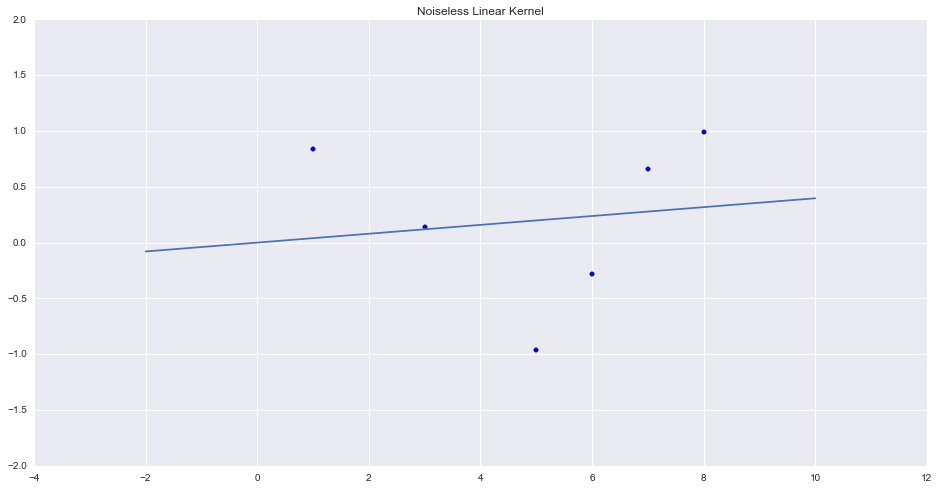

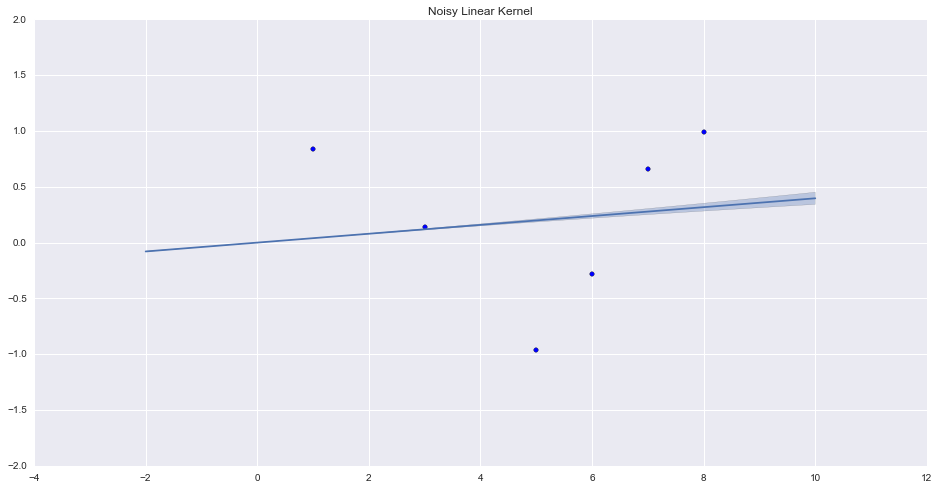

In [6]:
plt.scatter(data_xvals, data_yvals)
plt.plot(x_tests, lin_mus)
minim = numpy.array(lin_mus) - numpy.array(lin_sigmas)
maxim = numpy.array(lin_mus) + numpy.array(lin_sigmas)
plt.title("Noiseless Linear Kernel")
plt.ylim(-2,2)
plt.gca().fill_between(x_tests, minim, maxim, alpha=0.3)
plt.show()

plt.scatter(data_xvals, data_yvals)
plt.plot(x_tests, lin_noisy_mus)
minim = numpy.array(lin_noisy_mus) - numpy.array(lin_noisy_sigmas)
maxim = numpy.array(lin_noisy_mus) + numpy.array(lin_noisy_sigmas)
plt.title("Noisy Linear Kernel")
plt.ylim(-2,2)

plt.gca().fill_between(x_tests, minim, maxim, alpha=0.3)
plt.show()

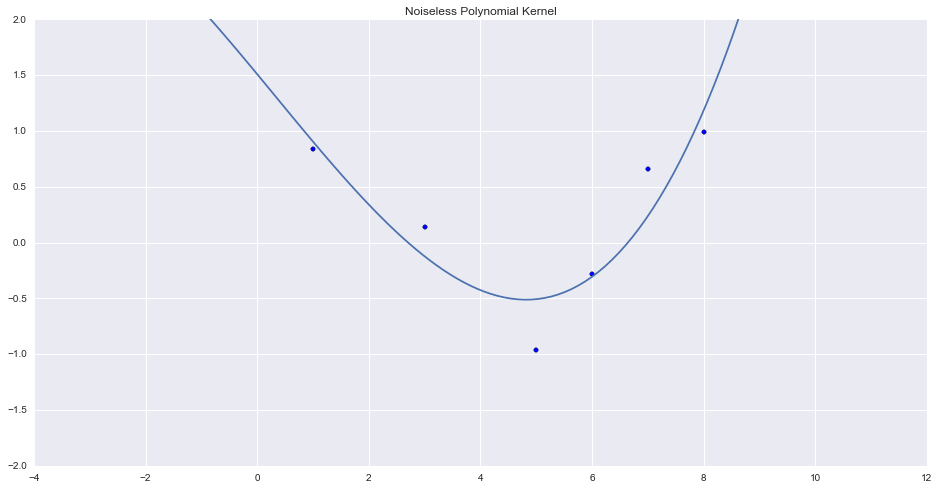

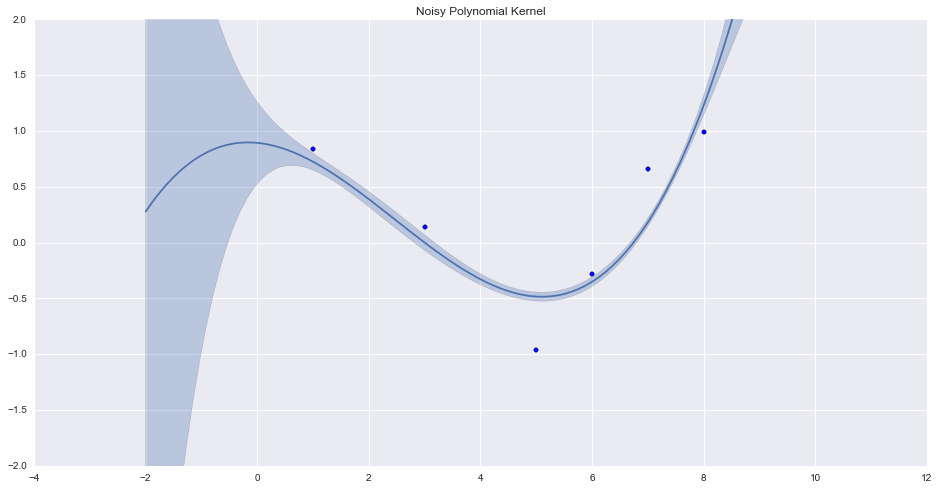

In [7]:
plt.scatter(data_xvals, data_yvals)
plt.plot(x_tests, poly_mus)

minim = numpy.array(poly_mus) - numpy.array(poly_sigmas)
maxim = numpy.array(poly_mus) + numpy.array(poly_sigmas)
plt.title("Noiseless Polynomial Kernel")
plt.ylim(-2,2)
plt.gca().fill_between(x_tests, minim, maxim, alpha=0.3)
plt.show()

plt.scatter(data_xvals, data_yvals)
plt.plot(x_tests, poly_noisy_mus)
minim = numpy.array(poly_noisy_mus) - numpy.array(poly_noisy_sigmas)
maxim = numpy.array(poly_noisy_mus) + numpy.array(poly_noisy_sigmas)
plt.title("Noisy Polynomial Kernel")
plt.ylim(-2,2)
plt.gca().fill_between(x_tests, minim, maxim, alpha=0.3)
plt.show()

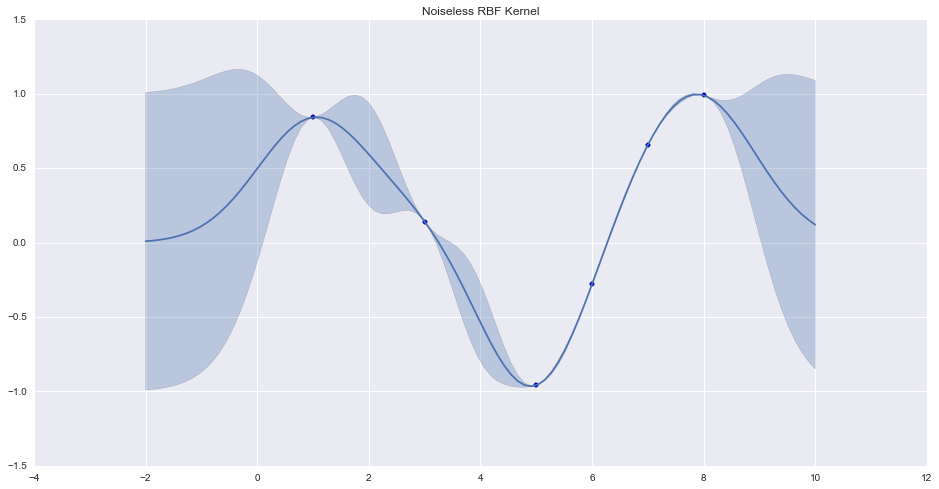

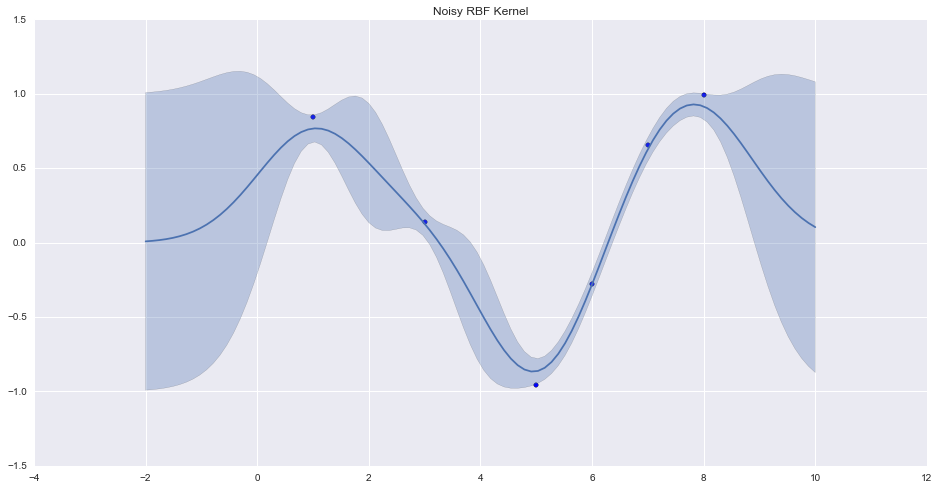

In [8]:
plt.scatter(data_xvals, data_yvals)
plt.plot(x_tests, rbf_mus)

minim = numpy.array(rbf_mus) - numpy.array(rbf_sigmas)
maxim = numpy.array(rbf_mus) + numpy.array(rbf_sigmas)
plt.title("Noiseless RBF Kernel")
plt.gca().fill_between(x_tests, minim, maxim, alpha=0.3)

plt.show()

plt.scatter(data_xvals, data_yvals)
plt.plot(x_tests, rbf_noisy_mus)
minim = numpy.array(rbf_noisy_mus) - numpy.array(rbf_noisy_sigmas)
maxim = numpy.array(rbf_noisy_mus) + numpy.array(rbf_noisy_sigmas)
plt.title("Noisy RBF Kernel")
plt.gca().fill_between(x_tests, minim, maxim, alpha=0.3)

plt.show()